# Plasmid heterozygosis: single-cell microfluidics data analysis

## Mounting gDrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup system

In [0]:
!pip install ipyparallel

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import pathlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display
import csv
import pandas as pd
from matplotlib import gridspec

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble']="\\usepackage{subdepth},\\usepackage{type1cm}"

print("> Python libraries imported")

> Python libraries imported


In [0]:
#sys.path.insert(0, '/Users/ESB/RPM_SYNC/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/content/drive/My Drive/pHT/code/uJ/uJ_src_pHT/python/')


from AnalysisFunctions import *
from PlottingFunctions import *

> Analysis Functions loaded
Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [0]:
expeLabel="HT-Sine-2hr"
list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32,xy33".split(",") 
#list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32".split(",") 




rootDir="../../data_sample/HT-Sine-2hr/"
rootDir="/content/drive/My Drive/pHT/data/HT-Sine-2hr/"

toFile=False
toFile=True

#Parameters 

frame2min=5

notcaptured_start=117
notcaptured_end=143

frame_experiment_start=1;
frame_signal_start=24-1
frame_signal_end=210
frame_experiment_end=210



frame_experiment_start=1;
frame_signal_start=24-1
frame_signal_end=116
frame_experiment_end=116

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
frames_list=[x for x in frames]
times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("\nFrame list:  %s"%(frames_list))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_signal_start=%s\t(%sh)"%(t_signal_start,t_signal_start/60))
print("t_signal_end=%s\t(%sh)"%(t_signal_end, t_signal_end/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))


#Prepare file system
dataPath="%sdata/DsRed+GFP/"%rootDir

figurePath="%sfigures/"%rootDir
if not os.path.exists(figurePath) and toFile:
    os.mkdir(figurePath)

normDataPath="%sdata/normData/"%rootDir
if not os.path.exists(normDataPath) and toFile:
    os.mkdir(normDataPath)

# normDataNPath="%sdata/normDataN/"%rootDir
# if not os.path.exists(normDataNPath) and toFile:
#     os.mkdir(normDataNPath)

    
# relIntensityPath="%sdata/relativeIntensity/"%rootDir
# if not os.path.exists(relIntensityPath) and toFile:
#     os.mkdir(relIntensityPath)

    
print("\n> Parameters loaded")


Frames:  range(1, 117)	 0.0->9.583333333333334 hours

Frame list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
t_experiment_start=0	(0.0h)
t_signal_start=110	(1.8333333333333333h)
t_signal_end=575	(9.583333333333334h)
t_experiment_end=575	(9.583333333333334h)

> Parameters loaded


## Loading files and making DataFrame

In [0]:

data_pos=[]
data_frame=[]
data_GFP=[]
data_DsRed=[]
data_phi=[]
data_rho=[]

pop_df_list=[]
loaded_frames=0;
for root, dirs, files in os.walk(dataPath):
    dirs.sort()
    files.sort()
    #print("*",path)
    path = root.split(os.sep)
    if(not path[-1] in list_pos):
        continue
    print(path)
    trap_df_list=[]
    for file in files:
        
        extension=""
        if len(os.path.splitext(file))>0:
            extension=pathlib.Path(file).suffix
        filePath = os.path.join(root,file)
        #print(filePath)
        if extension == ".txt":
            fileframe=file.split('_')[-1].split('.')[0]
            
            if(int(fileframe)>frame_experiment_end):
                continue
            print("%s/%s"%(fileframe,len(files)), end='\r')
            #print("Loading data from: " + file)
            
            data=fromFileData(filePath)
            this_pos=[]
            this_frame=[]
            this_GFP=[]
            this_DsRed=[]
            this_imgGFP=[]
            this_imgDsRed=[]
            this_phi=[]
            this_rho=[]
            this_id=[]
            this_label=[]
            for roi in data:
                this_id.append(int(roi[1]))
                this_imgGFP.append(str(roi[2]))
                this_imgDsRed.append(str(roi[3]))
                this_pos.append(str(roi[4]))
                this_frame.append(int(roi[5]))
                this_label.append(str(roi[6]))
                gfp=float(roi[7])
                dsred=float(roi[8])
                this_GFP.append(gfp)
                this_DsRed.append(dsred)
                
                phi,rho=cart2pol(gfp,dsred)    
                
                this_phi.append(phi)
                this_rho.append(rho)
                
            data_pos.extend(this_pos)
            data_frame.extend(this_frame)
            data_GFP.extend(this_GFP)
            data_DsRed.extend(this_DsRed)
            data_phi.extend(this_phi)
            data_rho.extend(this_rho)
            loaded_frames+=1
    
        trap_pos_df=pd.DataFrame({"pos":this_pos,"frame":this_frame,"id":this_id,"imgGFP":this_imgGFP,"imgDsRed":this_imgDsRed,"label":this_label,"GFP":this_GFP,"DsRed":this_DsRed,"phi":this_phi,"rho":this_rho})        
        trap_df_list.append(trap_pos_df)
    print()
    trap_df=pd.concat(trap_df_list)
    pop_df_list.append(trap_df)

pop_df=pd.concat(pop_df_list)
            
data_frame=np.asarray(data_frame)
data_GFP=np.asarray(data_GFP)
data_DsRed=np.asarray(data_DsRed)
data_phi=np.asarray(data_phi)
data_rho=np.asarray(data_rho) 
data_pos=np.asarray(data_pos)

print("> Data loaded (%s cells from %s images)"%(len(data_GFP), loaded_frames))
pop_df.head()

['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy01']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy02']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy03']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy05']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy06']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy07']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy08']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy09']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr', 'data', 'DsRed+GFP', 'xy10']
116/116
['', 'content', 'drive', 'My Drive', 'pHT', 'data', 'HT-Sine-2hr

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho
0,xy01,1,0,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n0_x277_y416,407.474,194.154,0.444657,451.365524
1,xy01,1,1,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n1_x247_y410,407.276,193.945,0.444427,451.096889
2,xy01,1,2,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n2_x500_y410,125.806,219.177,1.049719,252.716654
3,xy01,1,3,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n3_x483_y409,128.419,222.000,1.046363,256.467229
4,xy01,1,4,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n4_x111_y408,331.119,164.286,0.460566,369.634525


## Normalizing data by experiment maximum intensities & tramform to polar coordinates

In [0]:
trapDF_list=[]
pop_df_presignal=pop_df[(pop_df['frame']<frame_signal_start)&(pop_df['pos']!="xy33")].copy()
meanGFPp=pop_df_presignal['GFP'].mean()
meanDsRedp=pop_df_presignal['DsRed'].mean()

gfp_max=pop_df['GFP'].max()
rfp_max=pop_df['DsRed'].max()

for trap in list_pos:
    trap_df=pop_df[pop_df['pos']==trap].copy()
    #gfp_max=trap_df['GFP'].max()
    #rfp_max=trap_df['DsRed'].max()
    print(trap, end=' ')

    gfpsN=trap_df["GFP"]/gfp_max
    rfpsN=trap_df["DsRed"]/rfp_max
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    phis=[]
    rhos=[]
    relInt=[]
    absInt=[]
    for this_gfp,this_rfp in zip(gfpsN,rfpsN):
        this_phi,this_rho=cart2pol(this_gfp,this_rfp)
        phis.append(this_phi)
        rhos.append(this_rho)
        

    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phi_N":phis,"rho_N":rhos})
    trapDF_list.append(trapDF)
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.head()

xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho,GFP_N,DsRed_N,phi_N,rho_N
0,xy01,1,0,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n0_x277_y416,407.474,194.154,0.444657,451.365524,0.251212,0.206342,0.687645,0.325092
1,xy01,1,1,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n1_x247_y410,407.276,193.945,0.444427,451.096889,0.251090,0.206120,0.687355,0.324856
2,xy01,1,2,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n2_x500_y410,125.806,219.177,1.049719,252.716654,0.077561,0.232936,1.249372,0.245509
3,xy01,1,3,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n3_x483_y409,128.419,222.000,1.046363,256.467229,0.079172,0.235936,1.247039,0.248865
4,xy01,1,4,HT-Sine-2hr_xy01_GFP_001.tif,HT-Sine-2hr_xy01_DsRed_001.tif,roi_f1_n4_x111_y408,331.119,164.286,0.460566,369.634525,0.204139,0.174599,0.707560,0.268621


## This section discriminate data by their angle in polar coordinates 
#### Creates a histogram by trap/pos using the bins of the whole population distribution
#### Gives a data frame of data which angles have n element in a bin.


In [0]:
to_check_df_list=[]
n_lim=10  #use 10 for accurate rotation and normalization, 1 for exploring one trap
for angle_type in ["phi","phi_N"]:

    maxPhiT=pop_df_plus[angle_type].max()
    minPhiT=pop_df_plus[angle_type].min()
    phi_range=np.linspace(minPhiT,maxPhiT,100)
    for trap in list_pos:
        trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
        n,bins,patches=plt.hist(trap_df[angle_type],bins=phi_range)
        plt.close()

        lows=[]
        tmean=trap_df[angle_type].mean()
        for i,ni in enumerate(n):
            if(ni<=n_lim):
                lows.append(bins[i])
        lefts=[x for x in lows if x<tmean]
        rights=[x for x in lows if x>tmean]
        lt=0
        rt=bins[-1]
        if(len(lefts)>0):
            lt=lefts[-1]
        if(len(rights)>0):
            rt=rights[0]
        #print("Trap %s thresholds: %s\t%s"%(trap,lt,rt))
        to_check_trap_df=trap_df[(trap_df[angle_type]<=lt)|(trap_df[angle_type]>=rt)].copy()
        to_check_df_list.append(to_check_trap_df)
#        print(to_check_trap_df["frame"].tolist())
        #print()

to_check_df=pd.concat(to_check_df_list)
to_check_df.describe()

,frame,id,GFP,DsRed,phi,rho,GFP_N,DsRed_N,phi_N,rho_N
count,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000
mean,61.409620,224.363296,269.142798,293.941893,0.864587,418.606363,0.165930,0.312394,1.082741,0.369305
std,33.697634,202.123829,192.380626,130.984425,0.249751,194.351198,0.118605,0.139207,0.254536,0.148930
min,1.000000,0.000000,108.622000,103.973000,0.085455,150.400650,0.066967,0.110500,0.146611,0.129257
25%,33.000000,28.000000,167.796000,192.446000,0.791997,280.448174,0.103448,0.204527,1.050850,0.253493
50%,60.000000,191.000000,208.753000,262.590000,0.895531,372.317179,0.128699,0.279074,1.135887,0.342144
75%,92.000000,364.000000,290.795000,372.178000,1.031187,506.328863,0.179278,0.395541,1.236422,0.457806
max,116.000000,754.000000,1556.273000,904.576000,1.362598,1573.381632,0.959460,0.961360,1.448853,1.051466


### Subtract the elements of the population data frame

In [0]:
to_check_df.index
pop_df_plus_purged=pop_df_plus.copy()
pop_df_plus_purged.drop(to_check_df.index,axis=0,inplace=True)


## Center mean on $\pi/2$ and resize data to $[0,\pi]$

In [0]:
pop_df_plus_presignal=pop_df_plus[(pop_df_plus['frame']<frame_signal_start)&(pop_df_plus['pos']!="xy33")].copy()

minPhi_N=pop_df_plus_purged["phi_N"].min()
maxPhi_N=pop_df_plus_purged["phi_N"].max()
#meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=pop_df_plus_presignal["phi_N"].mean()
rot_theta_N=np.pi/2- meanPhi_N
meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

trapDF_list=[]

for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    print(trap,end=" ")
    
        
    phis_Nrot=trap_df['phi_N']+rot_theta_N
    rhosN01=trap_df['rho_N']
    maxRhoN99=rhosN01.mean()+4*rhosN01.std()
    #rhosN01=rhosN01/np.max(rhosN01)
    rhosN01=rhosN01/maxRhoN99
    phisN01=[]

    for this_phi in phis_Nrot:
        if(this_phi<meanPhi_Nrot):
            phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
        else:
            phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2

        phisN01.append(phi01)
    
    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"phi_Nrot":phis_Nrot,"phi_N01":phisN01,"rho_N01":rhosN01})
    trapDF_list.append(trapDF)
print()
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df_plus,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.describe()


xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 


,frame,id,GFP,DsRed,phi,rho,GFP_N,DsRed_N,phi_N,rho_N,phi_Nrot,phi_N01,rho_N01
count,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06
mean,5.189755e+01,2.682449e+02,4.111835e+02,1.808926e+02,4.306317e-01,4.520187e+02,2.534993e-01,1.922479e-01,6.602467e-01,3.211898e-01,1.577721e+00,1.539792e+00,5.809791e-01
std,3.326904e+01,1.703437e+02,1.071518e+02,3.723390e+01,1.218989e-01,1.016903e+02,6.606030e-02,3.957121e-02,1.387367e-01,6.315124e-02,1.387367e-01,3.429924e-01,1.114912e-01
min,1.000000e+00,0.000000e+00,1.066880e+02,1.013150e+02,8.545451e-02,1.504007e+02,6.577437e-02,1.076749e-01,1.466109e-01,1.292572e-01,1.064085e+00,-4.283299e-02,2.240169e-01
25%,2.300000e+01,1.260000e+02,3.453930e+02,1.586890e+02,3.713469e-01,3.854966e+02,2.129387e-01,1.686505e-01,5.911971e-01,2.787251e-01,1.508671e+00,1.372957e+00,5.053124e-01
50%,4.800000e+01,2.540000e+02,4.026280e+02,1.739270e+02,4.068492e-01,4.405804e+02,2.482248e-01,1.848451e-01,6.388711e-01,3.126173e-01,1.556345e+00,1.524776e+00,5.718385e-01
75%,8.000000e+01,3.900000e+02,4.685430e+02,1.943990e+02,4.514720e-01,5.055028e+02,2.888621e-01,2.066022e-01,6.962198e-01,3.530675e-01,1.613694e+00,1.660795e+00,6.444742e-01
max,1.160000e+02,7.660000e+02,1.622030e+03,9.409340e+02,1.362598e+00,1.772195e+03,1.000000e+00,1.000000e+00,1.448853e+00,1.276873e+00,2.366327e+00,3.239830e+00,2.051824e+00


In [0]:
pop_df_plus_limits=pop_df_plus_purged.copy()
pop_df_plus_limits=pd.merge(pop_df_plus,pop_df_plus_purged)


## Calculate deviation over mean

In [0]:
pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()

meanPhi_N01=pop_df_plus_presignal["phi_N01"].mean()

phis_N=pop_df_plus['phi_N01']
pos=pop_df_plus['pos']
ids=pop_df_plus['id']
framess=pop_df_plus['frame']

dev_mean_N=[]

for this_phiN in phis_N:
    this_devN=(this_phiN-meanPhi_N01)/np.pi
    dev_mean_N.append(this_devN)

tempDF=pd.DataFrame({"pos":pos,"frame":framess,"id":ids,"dev_mean_N":dev_mean_N})
pop_df_plus=pd.merge(pop_df_plus,tempDF,on=['pos','frame','id'])

pop_df_plus.describe()

,frame,id,GFP,DsRed,phi,rho,GFP_N,DsRed_N,phi_N,rho_N,phi_Nrot,phi_N01,rho_N01,dev_mean_N
count,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06,1.811949e+06
mean,5.189755e+01,2.682449e+02,4.111835e+02,1.808926e+02,4.306317e-01,4.520187e+02,2.534993e-01,1.922479e-01,6.602467e-01,3.211898e-01,1.577721e+00,1.539792e+00,5.809791e-01,4.858580e-03
std,3.326904e+01,1.703437e+02,1.071518e+02,3.723390e+01,1.218989e-01,1.016903e+02,6.606030e-02,3.957121e-02,1.387367e-01,6.315124e-02,1.387367e-01,3.429924e-01,1.114912e-01,1.091779e-01
min,1.000000e+00,0.000000e+00,1.066880e+02,1.013150e+02,8.545451e-02,1.504007e+02,6.577437e-02,1.076749e-01,1.466109e-01,1.292572e-01,1.064085e+00,-4.283299e-02,2.240169e-01,-4.989065e-01
25%,2.300000e+01,1.260000e+02,3.453930e+02,1.586890e+02,3.713469e-01,3.854966e+02,2.129387e-01,1.686505e-01,5.911971e-01,2.787251e-01,1.508671e+00,1.372957e+00,5.053124e-01,-4.824650e-02
50%,4.800000e+01,2.540000e+02,4.026280e+02,1.739270e+02,4.068492e-01,4.405804e+02,2.482248e-01,1.848451e-01,6.388711e-01,3.126173e-01,1.556345e+00,1.524776e+00,5.718385e-01,7.886226e-05
75%,8.000000e+01,3.900000e+02,4.685430e+02,1.943990e+02,4.514720e-01,5.055028e+02,2.888621e-01,2.066022e-01,6.962198e-01,3.530675e-01,1.613694e+00,1.660795e+00,6.444742e-01,4.337526e-02
max,1.160000e+02,7.660000e+02,1.622030e+03,9.409340e+02,1.362598e+00,1.772195e+03,1.000000e+00,1.000000e+00,1.448853e+00,1.276873e+00,2.366327e+00,3.239830e+00,2.051824e+00,5.459977e-01


## Save RelF Data

In [0]:
toFile=False

export_list=[normDataPath]
relInt_list=["phi_N01"]
absInt_list=["rho_N01"]

if toFile:

  for pos in list_pos:
      df_pos=pop_df_plus[pop_df_plus['pos']==pos]
      for frame in frames_list:
          df_pos_frame=df_pos[df_pos["frame"]==frame]
          
          ids=df_pos_frame['id']
          imgsGFP=df_pos_frame['imgGFP']
          imgsDsRed=df_pos_frame['imgDsRed']
          this_pos=df_pos_frame['pos']
          this_frame=df_pos_frame['frame']
          this_label=df_pos_frame['label']
          this_GFP=df_pos_frame['GFP']
          this_DsRed=df_pos_frame['DsRed']
          
          framestr=str(frame).zfill(3)
          fileNamep="%s_%s_%s.txt"%(expeLabel,pos,framestr)
          
          for i in range(len(export_list)):
              exportPath=export_list[i]
              relInt_type=relInt_list[i]
              absInt_type=absInt_list[i]
              
              this_relInt=df_pos_frame[relInt_type]
              this_absInt=df_pos_frame[absInt_type]
              
              rows=zip(ids,imgsGFP,imgsDsRed,this_pos,this_frame,this_label,this_GFP,this_DsRed,this_relInt,this_absInt)
                  
              outPath=os.path.join(exportPath,pos)
              if not os.path.exists(outPath):
                  os.mkdir(outPath)
              
              fileName=os.path.join(outPath,fileNamep)
              toFileData(fileName, rows)
              print(fileName)
          #print(x)

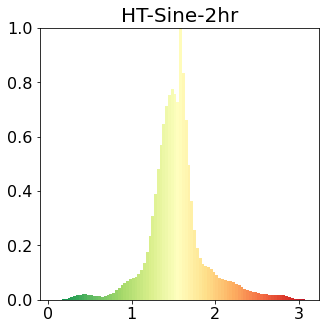

In [0]:
import matplotlib.patches as patches
def plot_distribution_color(ax,this_df,lrange,prop):
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phi_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    

    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    #print(len(h),len(n))
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
            )
        )
    
    return ax




meanPhiN01=pop_df_plus_limits.phi_N01.mean()
maxPhiN01=pop_df_plus_limits.phi_N01.max()
minPhiN01=pop_df_plus_limits.phi_N01.min()


lrange=np.linspace(0-.1,np.pi+.1,101)




#plt=plot_phi_hist(pop_df_plus['phi_N01'],phi_range,expeLabel)
fig,ax=plt.subplots(figsize=(5,5))
prop='phi_N01'
ax=plot_distribution_color(ax,pop_df_plus,lrange,prop)
plt.title("%s"%(expeLabel))

plt.show()
plt.close()

## Signal plot

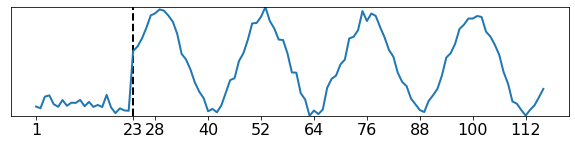

In [0]:
signal_df=pop_df_plus[pop_df_plus["pos"]=="xy33"]

tsignal=signal_df["frame"]
framesSignal=[frame_experiment_start,frame_signal_start]
for i in range(frame_signal_start,frame_experiment_end+1):
        
        x=(i-frame_experiment_start+3)
        x1=x%(30/frame2min)
        x2=x%(60/frame2min)
        if((x1==0) & (x2!=0) ):
            framesSignal.append(i)
        



valsignal=signal_df["phi_N01"]
maxsignal=valsignal.max()
minsignal=valsignal.min()

valsignaln=[(x-minsignal)/(maxsignal-minsignal)-.5 for x in valsignal]

fig,ax=plt.subplots(figsize=(10,2))

ax.plot(tsignal,valsignaln)
ax.vlines(x=frame_signal_start,ymax=.5,ymin=-.5,linestyles="dashed")


plt.xticks(framesSignal)
plt.ylim([-.5,.5])
plt.yticks([])
plt.show()

In [0]:
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end,frame_experiment_end]
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end]
frames2

[1, 23, 69, 116]

[0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793, 3.2986722862692828]


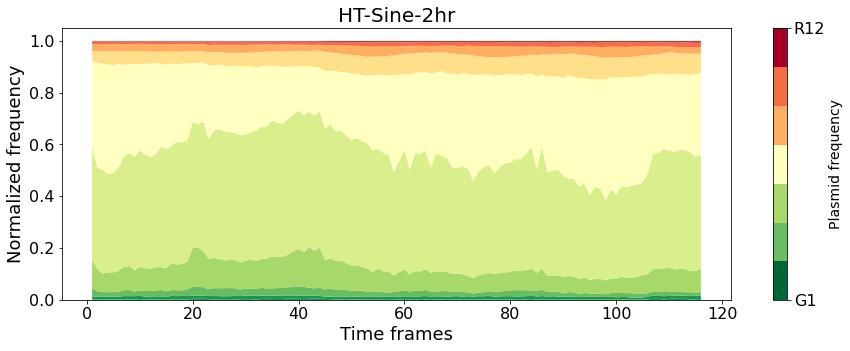

In [0]:
Ncolors=11
cmap = cm.get_cmap("RdYlGn", Ncolors)
cmap_r= cm.get_cmap("RdYlGn_r", Ncolors)


normed=True
bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.05]
binsf=[x*np.pi for x in bins]
print(binsf)

times=frames_list
time_freqs=[]
dcolor=[1-x for x in bins]

colorsl=cmap(dcolor)
for ti,t, in enumerate(times):

    this_df=pop_df_plus[pop_df_plus['frame']==t]
    this_data=this_df['phi_N01']
    n,bins,patches=plt.hist(this_data,bins=binsf)#,density='true')
    plt.close()
    tots=sum(n)
    this_freqs=[x for x in n]
    if(normed):
        this_freqs=[x/tots for x in n]
    time_freqs.append(this_freqs)

#time_freqs
#print(time_freqs)
freqs_time=np.zeros((len(time_freqs[0]),len(time_freqs)))

for ti,tfs in enumerate(time_freqs):
    for fi,ft in enumerate(tfs):
        freqs_time[fi][ti]=ft
#print(freqs_time)


#fig= plt.figure( figsize=(10, 5))    
fig,ax=plt.subplots(figsize=(15, 5))
#sc=ax.scatter(binsf,binsf,color=colorsl)
cs = ax.contourf([binsf, bins],cmap=cmap_r)
ax.clear()
ax.stackplot(times,freqs_time,colors=colorsl)
plt.xlabel("Time frames")
plt.ylabel("Normalized frequency")
#plt.colorbar()



cb = plt.colorbar(cs, cmap=cmap)
bcticks=np.linspace(cs.get_array().min(), cs.get_array().max(), 2)
cb.set_ticks(bcticks)
#cb.set_ticklabels(np.linspace(0, round(np.pi,2), 2))
cb.set_ticklabels(["G1","R12"])
cb.set_label('Plasmid frequency',fontsize=14)
#plt.colorbar(sc,ax=ax,ticks=binsf,label="x")
#plt.clim(0, np.pi)
plt.title(expeLabel)

plt.show()

DescribeResult(nobs=20443, minmax=(0.0, 2.997113663978285), mean=1.5110379459910093, variance=0.11070734354638175, skewness=0.27302643687203715, kurtosis=3.1029859094242234)
DescribeResult(nobs=18699, minmax=(0.14253398934524977, 3.0007066804484657), mean=1.5066952020897952, variance=0.1157690301345856, skewness=0.4112985229837686, kurtosis=2.973484422148701)
DescribeResult(nobs=13061, minmax=(0.16571318924059375, 3.109654033988338), mean=1.5749861986248839, variance=0.11410500046649891, skewness=0.37591181224014253, kurtosis=3.1334460542412295)
DescribeResult(nobs=11897, minmax=(0.10891941943078982, 3.2398304227285286), mean=1.5544211081708135, variance=0.1283629975758221, skewness=0.5468813968329583, kurtosis=3.505877686470421)


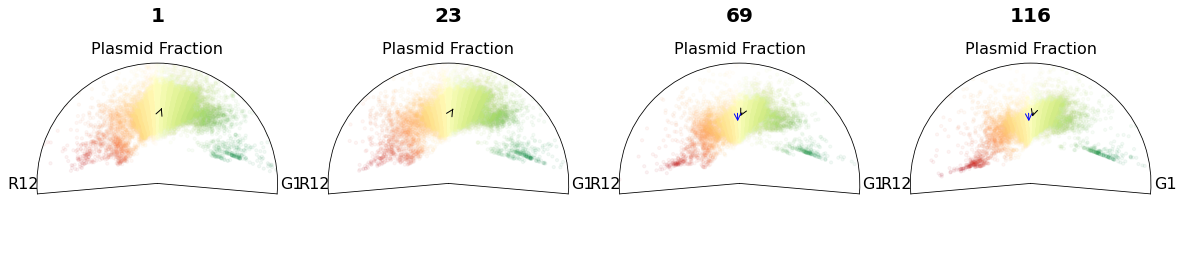

In [0]:

# outDir="%s2Dhist/"%figurePath
# if not os.path.exists(outDir):
#     os.mkdir(outDir)

def plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type):
    
    if(angle_type=="phi_N01"):
        rho_type="rho_N01"
    elif(angle_type=="phi_01"):
        rho_type="rho_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    this_moments=st.describe(phis01)
    print(this_moments)
    
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax
    
fig= plt.figure( figsize=(5*len(frames2), 5))    

ref_df=pd.DataFrame()
ref_df=pop_df_plus[pop_df_plus['frame']<frame_signal_start]
alph=.05
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phi_N01"


for ti,t, in enumerate(frames2):
    name="%s"%t
    axist="1%s%s"%(len(frames2),ti+1)
    ax=fig.add_subplot(axist,projection='polar') 
    #filter_t=filterFrames(data_frame, [t])
    this_df=pop_df_plus[pop_df_plus['frame']==t]
    
    plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type)

plt.show()
#print("Saved as %s%s_2Dhist_<pos>_<t>.tif"%(outDir, expeLabel))

In [0]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')